In [89]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [94]:

teams_df = pd.read_csv(".\Teams.csv")
playoffs_df = pd.read_csv(".\PlayoffTeams.csv")
salaries_df = pd.read_csv(".\Salaries.csv")
franchises_df = pd.read_csv(".\TeamsFranchises.csv")
# =======
# teams_df = pd.read_csv("Teams.csv")
# playoffs_df = pd.read_csv("PlayoffTeams.csv")
# salaries_df = pd.read_csv("Salaries.csv")
# franchises_df = pd.read_csv("TeamsFranchises.csv")
#teams_df.head()
#teams_df.count

In [84]:
# clean up Teams dataframes to chosen years (2005-2015)
teams_df = teams_df.loc[teams_df['yearID'] > 2004]
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
salaries_df = salaries_df.loc[salaries_df['yearID'] > 2004]

In [85]:
winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()
# winners_df.head()
# winners_df.count()
# losers_df.head()
# losers_df.count()
# print(winners_df)
# print(losers_df)

In [86]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()
playoff_count_df

SLN    18
NYA    12
DET    11
BOS    10
SFN    10
PHI    10
LAN     9
TEX     8
TBA     7
KCA     7
LAA     7
OAK     5
NYN     5
CHN     5
HOU     5
PIT     4
COL     4
CHA     4
ATL     4
BAL     4
CIN     3
ARI     3
MIL     3
CLE     3
MIN     3
WAS     2
TOR     2
SDN     2
dtype: int64

In [87]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()
# playoff_chart = playoff_count_df.plot.bar(rot=45)
# plt.title("MLB Teams in Playoff of World Series Matchups 2005-2015")
# plt.xlabel("Teams")
# plt.ylabel("Number of times in a Matchup")
# playoff_chart
# playoff_count_df.count()

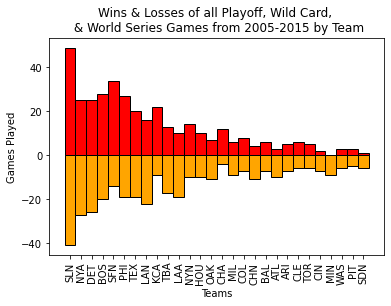

,W-Win,W-Loss,L-Win,L-Loss,Total Wins,Total Losses,Total Games
Teams,,,,,,,
SLN,39.0,19.0,10.0,22.0,49.0,41.0,90.0
NYA,17.0,6.0,8.0,21.0,25.0,27.0,52.0
DET,20.0,7.0,5.0,19.0,25.0,26.0,51.0
BOS,25.0,10.0,3.0,10.0,28.0,20.0,48.0
SFN,34.0,14.0,0.0,0.0,34.0,14.0,48.0
PHI,21.0,5.0,6.0,14.0,27.0,19.0,46.0
TEX,14.0,7.0,6.0,12.0,20.0,19.0,39.0
LAN,9.0,1.0,7.0,21.0,16.0,22.0,38.0
KCA,19.0,5.0,3.0,4.0,22.0,9.0,31.0


In [88]:
# stacked bar graph for wins and loses per match up AND ratio of wins to total games played per year per team

wins_losses_df = playoffs_df.copy()

# Seperating out data by team for wins and losses

wins = wins_losses_df[["teamIDwinner", "wins",
                       "losses"]].rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})

losses = wins_losses_df[["teamIDloser", "losses",
                         "wins"]].rename(columns={"teamIDloser":"Teams", "losses":"L-Win", "wins":"L-Loss"})

win_data = wins.groupby(["Teams"]).sum()

loss_data = losses.groupby(["Teams"]).sum()

games_df = pd.merge(win_data, loss_data, on="Teams", how="outer")

games_df = games_df.fillna(0)

games_df["Total Wins"] = games_df["W-Win"] + games_df["L-Win"]

games_df["Total Losses"] = games_df["W-Loss"] + games_df["L-Loss"]

games_df["Total Games"] = games_df["Total Wins"] + games_df["Total Losses"]

games_df.sort_values(by=["Total Games"], inplace=True, ascending=False)

# Bar chart

win_bar = games_df["Total Wins"]
# loss_bar = games_df["Total Losses"]
loss_bar = games_df["Total Losses"]*(-1)

bars = np.add(win_bar, loss_bar).tolist()

r = np.arange(0,56,2)

names = games_df.index.values
width = 2

# plt.bar(r, win_bar, bottom=loss_bar, color='red', edgecolor='black', width=barWidth)
plt.bar(r, win_bar, color='red', edgecolor='black', width=width)
plt.bar(r, loss_bar, color='orange', edgecolor='black', width=width)

plt.xticks(r, names, rotation=90)
plt.xlabel("Teams")
plt.ylabel("Games Played")
plt.title("Wins & Losses of all Playoff, Wild Card, \n & World Series Games from 2005-2015 by Team")
plt.show()

# This is just a check. It provides the totals of all games per team. Since every match has a winner and a loser,
# the "Total Games" will be double the number of matches in the playoffs and WS between 2005-2015.
# games_df.sum()

games_df

In [90]:
# ratio of wins to total games played per year per team

wins_year = wins_losses_df[["teamIDwinner", "wins", "losses", 
                       "yearID"]].rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})

wins_year = wins_year.groupby(["Teams", "yearID"]).sum()

losses_year = wins_losses_df[["teamIDloser", "losses",
                              "wins", "yearID"]].rename(columns={"teamIDloser":"Teams", "losses":"L-Win", "wins":"L-Loss"})

losses_year = losses_year.groupby(["Teams", "yearID"]).sum()

wins_year

W-Win  W-Loss
Teams yearID               
ARI   2007        3       0
BAL   2012        1       0
      2014        3       0
BOS   2007       11       3
      2008        3       1
      2013       11       6
CHA   2005       11       1
CHN   2015        4       1
CLE   2007        3       1
COL   2007        7       0
DET   2006        7       1
      2011        3       2
      2012        7       2
      2013        3       2
HOU   2005        7       3
      2015        1       0
KCA   2014        8       0
      2015       11       5
LAA   2005        3       2
      2009        3       0
LAN   2008        3       0
      2009        3       0
      2013        3       1
MIL   2011        3       2
NYA   2009       11       4
      2010        3       0
      2012        3       2
NYN   2006        3       0
      2015        7       2
OAK   2006        3       0
PHI   2008       11       3
      2009        7       2
      2010        3       0
PIT   2013        1       0
SFN   2010       11       4
      2012       11       5
      2014       12       5
SLN   2005        3       0
      2006       11       5
      2011       11       7
      2012        4       2
      2013        7       4
      2014        3       1
TBA   2008        7       4
      2013        1       0
TEX   2010        7       4
      2011        7       3
TOR   2015        3       2

In [91]:
loser_teams = playoffs_df['teamIDloser'].value_counts()


In [139]:
#MONEY SECTION
#How much is a team that got to the playoffs between 2005-2015 spending #per year
# #What is the average per team per general player per    
# Create 2 dataframes answering 2 objectives:
# salaries_describe['Sum'] - How much is a play offs team spends total per year 
# salaries_describe['mean'] - How much the playoff team spends per general player per year
# top_ten_sum; top_ten_mean - Find the teams that spend Too Much - top 10% (?) 
# Make Bar graph for 1 and 2

#salaries_test_df = salaries_df.loc[salaries_df['teamID'].isin(playoff_count_df.index)]
salaries_test_df = salaries_df.loc[salaries_df['teamID'].isin(['SLN','NYA','DET','OAK'])]
salaries_test_df = salaries_test_df.loc[salaries_test_df['yearID']>2004]

salaries_test_df = salaries_test_df.groupby(['yearID', 'teamID'])

salaries_describe = salaries_test_df.describe()/1000000
salaries_describe['salary','Sum'] = salaries_test_df.sum()/1000000

salaries_for_line_df = pd.DataFrame(data={'Mean':salaries_describe['salary','mean'],'Sum':salaries_describe['salary','Sum']})
quantile_075 = salaries_describe.quantile(.50)

top_ten_mean = salaries_describe.loc[salaries_describe['salary','mean']>quantile_075['salary']['mean']]
top_ten_sum = salaries_describe.loc[salaries_describe['salary','Sum']>quantile_075['salary']['Sum']]
top_ten_mean

salary                                                    \
                  count      mean       std       min       25%       50%   
yearID teamID                                                               
2005   NYA     0.000026  8.011801  7.117015  0.317200  2.187500  5.833334   
2006   NYA     0.000028  6.952253  7.343890  0.328600  0.912500  2.925000   
2007   NYA     0.000028  6.759252  7.725153  0.382048  0.450042  2.250000   
2008   DET     0.000030  4.589507  4.847263  0.390000  0.420000  1.487500   
       NYA     0.000030  6.929893  8.164959  0.390000  0.400313  2.437500   
2009   DET     0.000028  4.110184  4.865921  0.400000  0.746250  2.237500   
       NYA     0.000026  7.748046  8.596408  0.400000  0.438506  5.200000   
2010   DET     0.000027  4.550553  5.770276  0.400000  0.416750  1.500000   
       NYA     0.000025  8.253336  9.267188  0.410800  0.487975  5.500000   
2011   DET     0.000027  3.914823  5.259443  0.414000  0.430000  1.300000   
       NYA     0.000029  6.975001  8.531288  0.419300  0.650000  2.700000   
2012   DET     0.000029  4.562069  6.557916  0.480000  0.495000  1.100000   
       NYA     0.000029  6.776631  8.119776  0.482000  0.528475  2.800000   
       SLN     0.000028  3.939316  4.858527  0.480000  0.495000  0.800000   
2013   DET     0.000024  6.082896  6.873032  0.490000  0.763750  3.750000   
       NYA     0.000031  7.483190  8.784431  0.490000  0.546813  2.850000   
2014   DET     0.000023  6.645891  7.276494  0.500000  0.515000  2.500000   
       NYA     0.000024  8.230996  8.609457  0.502100  0.537919  4.357500   
       SLN     0.000028  4.310464  6.143556  0.500000  0.517500  0.767500   
2015   DET     0.000025  6.891390  8.081387  0.507500  0.520000  3.000000   
       NYA     0.000029  7.336274  8.355235  0.507500  0.554100  3.300000   
       SLN     0.000026  4.586212  5.801085  0.507500  0.524000  2.000000   

                                                 
                     75%        max         Sum  
yearID teamID                                    
2005   NYA     12.839286  26.000000  208.306817  
2006   NYA     12.250000  21.680727  194.663079  
2007   NYA     12.250000  23.428571  189.259045  
2008   DET      7.750000  15.768174  137.685196  
       NYA     13.000000  28.000000  207.896789  
2009   DET      5.025000  18.971596  115.085145  
       NYA     13.075000  33.000000  201.449189  
2010   DET      6.868026  20.000000  122.864928  
       NYA     13.100000  33.000000  206.333389  
2011   DET      5.500000  20.000000  105.700231  
       NYA     10.000000  32.000000  202.275028  
2012   DET      5.500000  23.000000  132.300000  
       NYA     10.250000  30.000000  196.522289  
       SLN      7.375000  16.292362  110.300862  
2013   DET      7.243750  23.000000  145.989500  
       NYA     13.500000  29.000000  231.978886  
2014   DET     13.000000  22.000000  152.855500  
       NYA     16.250000  23.000000  197.543907  
       SLN      5.812500  19.500000  120.693000  
2015   DET     10.500000  28.000000  172.284750  
       NYA     13.000000  23.125000  212.751957  
       SLN      6.281250  19.500000  119.241500

In [133]:
mean_graph_df = pd.DataFrame(data={'Mean':top_ten_mean['salary','mean'],'Sum':top_ten_mean['salary','Sum']})
mean_graph_df

Mean         Sum
yearID teamID                      
2005   NYA     8.011801  208.306817
2006   NYA     6.952253  194.663079
2007   NYA     6.759252  189.259045
2008   DET     4.589507  137.685196
       NYA     6.929893  207.896789
2009   DET     4.110184  115.085145
       NYA     7.748046  201.449189
2010   DET     4.550553  122.864928
       NYA     8.253336  206.333389
2011   DET     3.914823  105.700231
       NYA     6.975001  202.275028
2012   DET     4.562069  132.300000
       NYA     6.776631  196.522289
       SLN     3.939316  110.300862
2013   DET     6.082896  145.989500
       NYA     7.483190  231.978886
2014   DET     6.645891  152.855500
       NYA     8.230996  197.543907
       SLN     4.310464  120.693000
2015   DET     6.891390  172.284750
       NYA     7.336274  212.751957
       SLN     4.586212  119.241500

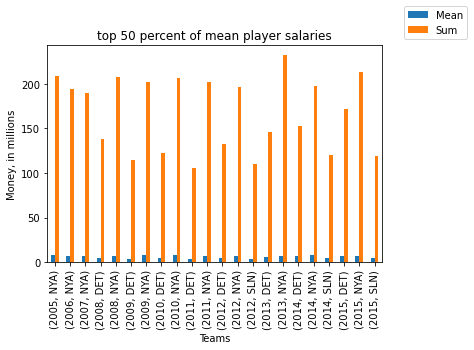

In [137]:
mean_graph_df = pd.DataFrame(data={'Mean':top_ten_mean['salary','mean'],'Sum':top_ten_mean['salary','Sum']})
mean_graph_df

mean_graph_plt = mean_graph_df.plot.bar(rot=90)
plt.title("top 50 percent of mean player salaries")
plt.xlabel("Teams")
plt.ylabel("Money, in millions")
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
mean_graph_plt


In [191]:
#line chart
salaries_for_line_df.head()
nya_mean = salaries_for_line_df.xs('NYA', level='teamID')['Mean']
sln_mean = salaries_for_line_df.xs('SLN', level='teamID')['Mean']
det_mean = salaries_for_line_df.xs('DET', level='teamID')['Mean']
oak_mean = salaries_for_line_df.xs('OAK', level='teamID')['Mean']
nya_sum = salaries_for_line_df.xs('NYA', level='teamID')['Sum']
sln_sum = salaries_for_line_df.xs('SLN', level='teamID')['Sum']
det_sum = salaries_for_line_df.xs('DET', level='teamID')['Sum']
oak_sum = salaries_for_line_df.xs('OAK', level='teamID')['Sum']

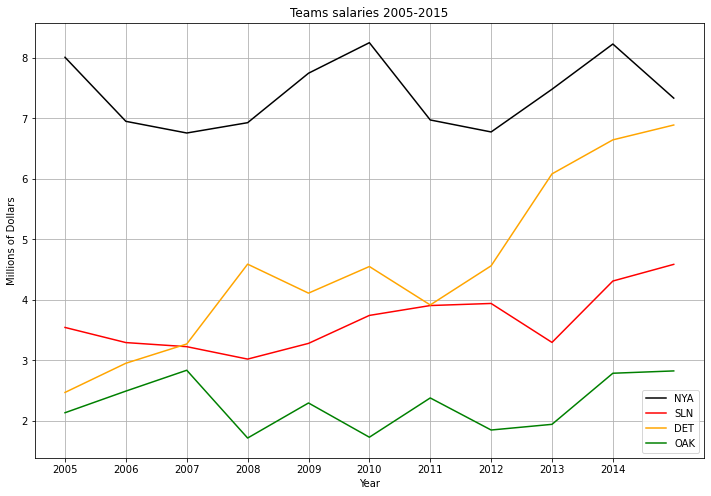

In [187]:
plt.figure(figsize =[12,8])
nya = plt.plot( nya_mean.index, nya_mean, color='black', label='NYA')
sln = plt.plot(sln_mean.index, sln_mean, color="red", label='SLN')
det = plt.plot(det_mean.index, det_mean, color="orange", label='DET')
oak = plt.plot(oak_mean.index, oak_mean, color="green", label='OAK')

plt.title("Teams salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("Mean, in millions of Dollars")
plt.grid(b=True)
plt.xticks(np.arange(2005,2015,step=1))
plt.legend()

plt.show()

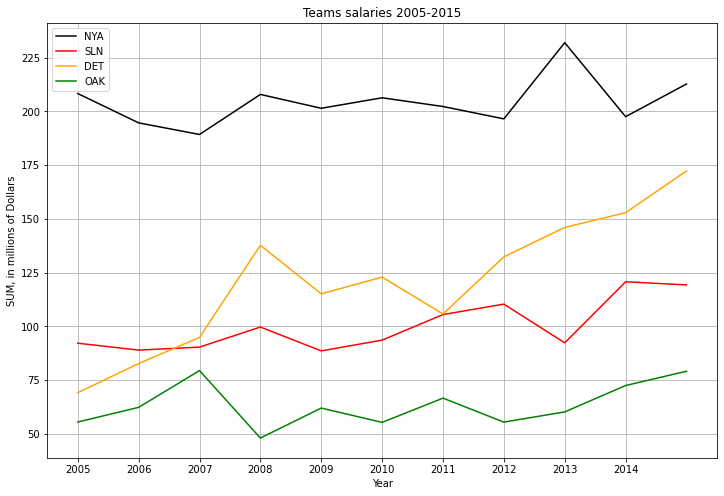

In [192]:
plt.figure(figsize =[12,8])
nyaS = plt.plot(nya_sum.index, nya_sum, color='black', label='NYA')
slnS = plt.plot(sln_sum.index, sln_sum, color="red", label='SLN')
detS = plt.plot(det_sum.index, det_sum, color="orange", label='DET')
oakS = plt.plot(oak_sum.index, oak_sum, color="green", label='OAK')

plt.title("Teams salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("SUM, in millions of Dollars")
plt.grid(b=True)
plt.xticks(np.arange(2005,2015,step=1))
plt.legend()

plt.show()

In [130]:
top_ten_sum

salary                                                    \
                  count      mean       std       min       25%       50%   
yearID teamID                                                               
2005   NYA     0.000026  8.011801  7.117015  0.317200  2.187500  5.833334   
2006   NYA     0.000028  6.952253  7.343890  0.328600  0.912500  2.925000   
2007   NYA     0.000028  6.759252  7.725153  0.382048  0.450042  2.250000   
2008   DET     0.000030  4.589507  4.847263  0.390000  0.420000  1.487500   
       NYA     0.000030  6.929893  8.164959  0.390000  0.400313  2.437500   
2009   DET     0.000028  4.110184  4.865921  0.400000  0.746250  2.237500   
       NYA     0.000026  7.748046  8.596408  0.400000  0.438506  5.200000   
2010   DET     0.000027  4.550553  5.770276  0.400000  0.416750  1.500000   
       NYA     0.000025  8.253336  9.267188  0.410800  0.487975  5.500000   
2011   DET     0.000027  3.914823  5.259443  0.414000  0.430000  1.300000   
       NYA     0.000029  6.975001  8.531288  0.419300  0.650000  2.700000   
2012   DET     0.000029  4.562069  6.557916  0.480000  0.495000  1.100000   
       NYA     0.000029  6.776631  8.119776  0.482000  0.528475  2.800000   
       SLN     0.000028  3.939316  4.858527  0.480000  0.495000  0.800000   
2013   DET     0.000024  6.082896  6.873032  0.490000  0.763750  3.750000   
       NYA     0.000031  7.483190  8.784431  0.490000  0.546813  2.850000   
2014   DET     0.000023  6.645891  7.276494  0.500000  0.515000  2.500000   
       NYA     0.000024  8.230996  8.609457  0.502100  0.537919  4.357500   
       SLN     0.000028  4.310464  6.143556  0.500000  0.517500  0.767500   
2015   DET     0.000025  6.891390  8.081387  0.507500  0.520000  3.000000   
       NYA     0.000029  7.336274  8.355235  0.507500  0.554100  3.300000   
       SLN     0.000026  4.586212  5.801085  0.507500  0.524000  2.000000   

                                                 
                     75%        max         Sum  
yearID teamID                                    
2005   NYA     12.839286  26.000000  208.306817  
2006   NYA     12.250000  21.680727  194.663079  
2007   NYA     12.250000  23.428571  189.259045  
2008   DET      7.750000  15.768174  137.685196  
       NYA     13.000000  28.000000  207.896789  
2009   DET      5.025000  18.971596  115.085145  
       NYA     13.075000  33.000000  201.449189  
2010   DET      6.868026  20.000000  122.864928  
       NYA     13.100000  33.000000  206.333389  
2011   DET      5.500000  20.000000  105.700231  
       NYA     10.000000  32.000000  202.275028  
2012   DET      5.500000  23.000000  132.300000  
       NYA     10.250000  30.000000  196.522289  
       SLN      7.375000  16.292362  110.300862  
2013   DET      7.243750  23.000000  145.989500  
       NYA     13.500000  29.000000  231.978886  
2014   DET     13.000000  22.000000  152.855500  
       NYA     16.250000  23.000000  197.543907  
       SLN      5.812500  19.500000  120.693000  
2015   DET     10.500000  28.000000  172.284750  
       NYA     13.000000  23.125000  212.751957  
       SLN      6.281250  19.500000  119.241500

In [185]:
#PLAYERS SALARIES SECTION
#select years 2005-2015
salaries_yr = salaries_df.loc[salaries_df['yearID'] > 2004]


In [186]:
#Find top salaries - using df with years 2005-2015 and selecting for playoff teams
#Looking for top 10%, narrow down to 900ish rows

#salaries_yr.describe()
salaries_yr_df = salaries_yr.loc[salaries_yr['teamID'].isin(playoff_count_df.index)]
salaries_yr_df

millions_of_dollars  = salaries_yr_df["salary"]/1000000
salaries_yr_df["Salary in Millions"] = millions_of_dollars
salaries_yr_df

salaries_millions = salaries_yr_df.loc[salaries_yr_df["Salary in Millions"]>9.5]
salaries_millions

#groupby players
top_total_spenders = salaries_millions.groupby(["playerID", "yearID"]).sum()
top_total_spenders.head()
#top_total_spenders.count()


salary  Salary in Millions
playerID  yearID                              
abreubo01 2005    13100000                13.1
          2006    13600000                13.6
          2007    15000000                15.0
          2008    16000000                16.0
anderbr04 2015    10000000                10.0

In [107]:
top_total_spenders_sorted = top_total_spenders.sort_values(["Salary in Millions"], ascending=False)
top_total_spenders_sorted.head(23)

salary  Salary in Millions  Average Salary
playerID  yearID                                              
rodrial01 2009    33000000           33.000000             NaN
          2010    33000000           33.000000             NaN
kershcl01 2015    32571000           32.571000             NaN
rodrial01 2011    32000000           32.000000             NaN
          2012    30000000           30.000000             NaN
          2013    29000000           29.000000             NaN
verlaju01 2015    28000000           28.000000             NaN
rodrial01 2008    28000000           28.000000             NaN
wellsve01 2011    26187500           26.187500             NaN
rodrial01 2005    26000000           26.000000             NaN
greinza01 2014    26000000           26.000000             NaN
howarry01 2015    25000000           25.000000             NaN
leecl02   2013    25000000           25.000000             NaN
howarry01 2014    25000000           25.000000             NaN
greinza01 2015    25000000           25.000000             NaN
leecl02   2014    25000000           25.000000             NaN
wellsve01 2013    24642857           24.642857             NaN
sabatcc01 2010    24285714           24.285714             NaN
          2013    24285714           24.285714             NaN
          2011    24285714           24.285714             NaN
wellsve01 2012    24187500           24.187500             NaN
fieldpr01 2014    24000000           24.000000             NaN
pujolal01 2015    24000000           24.000000             NaN

In [75]:
#Top 10 earners average
#1 A Rod
rodrial01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="rodrial01"]
#rod_df = rodrial01.set_index("yearID")
rodrial01


,yearID,teamID,lgID,playerID,salary,Salary in Millions
16949,2005,NYA,AL,rodrial01,26000000,26.000000
17774,2006,NYA,AL,rodrial01,21680727,21.680727
18619,2007,NYA,AL,rodrial01,22708525,22.708525
19461,2008,NYA,AL,rodrial01,28000000,28.000000
20286,2009,NYA,AL,rodrial01,33000000,33.000000
21109,2010,NYA,AL,rodrial01,33000000,33.000000
21945,2011,NYA,AL,rodrial01,32000000,32.000000
22793,2012,NYA,AL,rodrial01,30000000,30.000000
23616,2013,NYA,AL,rodrial01,29000000,29.000000
25239,2015,NYA,AL,rodrial01,22000000,22.000000


In [44]:
#2
kershcl01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="kershcl01"]
kershcl01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17566,2006,DET,AL,verlaju01,980000,0.980
18389,2007,DET,AL,verlaju01,1030000,1.030
19233,2008,DET,AL,verlaju01,1130000,1.130
20074,2009,DET,AL,verlaju01,3675000,3.675
20893,2010,DET,AL,verlaju01,6850000,6.850
21720,2011,DET,AL,verlaju01,12850000,12.850
22574,2012,DET,AL,verlaju01,20100000,20.100
23407,2013,DET,AL,verlaju01,20100000,20.100
24222,2014,DET,AL,verlaju01,20000000,20.000
25031,2015,DET,AL,verlaju01,28000000,28.000


In [45]:
#3
verlaju01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="verlaju01"]
verlaju01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17566,2006,DET,AL,verlaju01,980000,0.980
18389,2007,DET,AL,verlaju01,1030000,1.030
19233,2008,DET,AL,verlaju01,1130000,1.130
20074,2009,DET,AL,verlaju01,3675000,3.675
20893,2010,DET,AL,verlaju01,6850000,6.850
21720,2011,DET,AL,verlaju01,12850000,12.850
22574,2012,DET,AL,verlaju01,20100000,20.100
23407,2013,DET,AL,verlaju01,20100000,20.100
24222,2014,DET,AL,verlaju01,20000000,20.000
25031,2015,DET,AL,verlaju01,28000000,28.000


In [46]:
#4
wellsve01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="wellsve01"]
wellsve01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17262,2005,TOR,AL,wellsve01,3070000,3.070000
18080,2006,TOR,AL,wellsve01,4470000,4.470000
18924,2007,TOR,AL,wellsve01,8787500,8.787500
19779,2008,TOR,AL,wellsve01,3687500,3.687500
20595,2009,TOR,AL,wellsve01,4687500,4.687500
21423,2010,TOR,AL,wellsve01,15687500,15.687500
21832,2011,LAA,AL,wellsve01,26187500,26.187500
22658,2012,LAA,AL,wellsve01,24187500,24.187500
23621,2013,NYA,AL,wellsve01,24642857,24.642857


In [47]:
#5
greinza01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="greinza01"]
greinza01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
16808,2005,KCA,AL,greinza01,330500,0.3305
17635,2006,KCA,AL,greinza01,365500,0.3655
18463,2007,KCA,AL,greinza01,407000,0.4070
19308,2008,KCA,AL,greinza01,1400000,1.4000
20145,2009,KCA,AL,greinza01,3750000,3.7500
20966,2010,KCA,AL,greinza01,7250000,7.2500
21876,2011,MIL,NL,greinza01,13500000,13.5000
22728,2012,MIL,NL,greinza01,13500000,13.5000
23497,2013,LAN,NL,greinza01,21000000,21.0000
24307,2014,LAN,NL,greinza01,26000000,26.0000


In [48]:
#6
howarry01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="howarry01"]
howarry01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17848,2006,PHI,NL,howarry01,355000,0.355
18696,2007,PHI,NL,howarry01,900000,0.900
19534,2008,PHI,NL,howarry01,10000000,10.000
20358,2009,PHI,NL,howarry01,15000000,15.000
21190,2010,PHI,NL,howarry01,19000000,19.000
22016,2011,PHI,NL,howarry01,20000000,20.000
22866,2012,PHI,NL,howarry01,20000000,20.000
23694,2013,PHI,NL,howarry01,20000000,20.000
24500,2014,PHI,NL,howarry01,25000000,25.000
25318,2015,PHI,NL,howarry01,25000000,25.000


In [49]:
#7
leecl02 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="leecl02"]
leecl02

,yearID,teamID,lgID,playerID,salary,Salary in Millions
16671,2005,CLE,AL,leecl02,345000,0.3450
17497,2006,CLE,AL,leecl02,406200,0.4062
18323,2007,CLE,AL,leecl02,3000000,3.0000
19170,2008,CLE,AL,leecl02,4000000,4.0000
20009,2009,CLE,AL,leecl02,6000000,6.0000
22019,2011,PHI,NL,leecl02,11000000,11.0000
22868,2012,PHI,NL,leecl02,21500000,21.5000
23698,2013,PHI,NL,leecl02,25000000,25.0000
24502,2014,PHI,NL,leecl02,25000000,25.0000


In [51]:
#8
sabatcc01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="sabatcc01"]
sabatcc01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
16679,2005,CLE,AL,sabatcc01,5250000,5.250000
17504,2006,CLE,AL,sabatcc01,7000000,7.000000
18332,2007,CLE,AL,sabatcc01,8750000,8.750000
19177,2008,CLE,AL,sabatcc01,11000000,11.000000
20287,2009,NYA,AL,sabatcc01,15285714,15.285714
21110,2010,NYA,AL,sabatcc01,24285714,24.285714
21946,2011,NYA,AL,sabatcc01,24285714,24.285714
22795,2012,NYA,AL,sabatcc01,23000000,23.000000
23617,2013,NYA,AL,sabatcc01,24285714,24.285714
24425,2014,NYA,AL,sabatcc01,23000000,23.000000


In [54]:
#9
fieldpr01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="fieldpr01"]
fieldpr01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17711,2006,MIL,NL,fieldpr01,329500,0.3295
18547,2007,MIL,NL,fieldpr01,415000,0.4150
19388,2008,MIL,NL,fieldpr01,670000,0.6700
20218,2009,MIL,NL,fieldpr01,7000000,7.0000
21042,2010,MIL,NL,fieldpr01,11000000,11.0000
21872,2011,MIL,NL,fieldpr01,15500000,15.5000
22558,2012,DET,AL,fieldpr01,23000000,23.0000
23393,2013,DET,AL,fieldpr01,23000000,23.0000
24689,2014,TEX,AL,fieldpr01,24000000,24.0000
25501,2015,TEX,AL,fieldpr01,24000000,24.0000


In [111]:
#10
pujolal01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="pujolal01"]
pujolal01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17170,2005,SLN,NL,pujolal01,11000000,11.000000
17988,2006,SLN,NL,pujolal01,14000000,14.000000
18834,2007,SLN,NL,pujolal01,12937813,12.937813
19686,2008,SLN,NL,pujolal01,13870949,13.870949
20501,2009,SLN,NL,pujolal01,14427326,14.427326
21331,2010,SLN,NL,pujolal01,14595953,14.595953
22170,2011,SLN,NL,pujolal01,14508395,14.508395
22651,2012,LAA,AL,pujolal01,12000000,12.000000
23475,2013,LAA,AL,pujolal01,16000000,16.000000
24283,2014,LAA,AL,pujolal01,23000000,23.000000


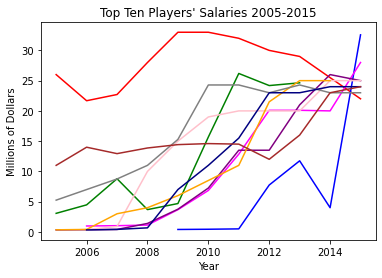

In [118]:
x_axis = rodrial01.loc[:,"yearID"]
x_axis2 = kershcl01.loc[:,"yearID"]
x_axis3 = verlaju01.loc[:,"yearID"]
x_axis4 = wellsve01.loc[:,"yearID"]
x_axis5 = greinza01.loc[:,"yearID"]
x_axis6 = howarry01.loc[:,"yearID"]
x_axis7 = leecl02.loc[:,"yearID"]
x_axis8 = sabatcc01.loc[:,"yearID"]
x_axis9 = fieldpr01.loc[:,"yearID"]
x_axis10 = pujolal01.loc[:,"yearID"]

rodrial01_sal = rodrial01.loc[:,"Salary in Millions"]
kershcl01_sal = kershcl01.loc[:,"Salary in Millions"]
verlaju01_sal = verlaju01.loc[:,"Salary in Millions"]
wellsve01_sal = wellsve01.loc[:,"Salary in Millions"]
greinza01_sal = greinza01.loc[:,"Salary in Millions"]  
howarry01_sal = howarry01.loc[:,"Salary in Millions"] 
leecl02_sal = leecl02.loc[:,"Salary in Millions"]
sabatcc01_sal = sabatcc01.loc[:,"Salary in Millions"]
fieldpr01_sal = fieldpr01.loc[:,"Salary in Millions"]  
pujolal01_sal = pujolal01.loc[:,"Salary in Millions"]
    
rod = plt.plot(x_axis, rodrial01_sal, color="red", label="1")
ker = plt.plot(x_axis2, kershcl01_sal, color="blue", label="2")
ver = plt.plot(x_axis3, verlaju01_sal, color="magenta", label="3")
wel = plt.plot(x_axis4, wellsve01_sal, color="green", label="4")
gre = plt.plot(x_axis5, greinza01_sal, color="purple", label="5")
how = plt.plot(x_axis6, howarry01_sal, color="pink", label="6")
lee = plt.plot(x_axis7, leecl02_sal, color="orange", label="7")
sab = plt.plot(x_axis8, sabatcc01_sal, color="gray", label="8")
fie = plt.plot(x_axis9, fieldpr01_sal, color="navy", label="9")
puj = plt.plot(x_axis10, pujolal01_sal, color="brown", label="10")

plt.title("Top Ten Players' Salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("Millions of Dollars")

plt.show()

In [49]:
# salaries = salaries_yr_df["Salary in Millions"]
# fig1, ax1 = plt.subplots()
# ax1.set_title('MLB Salaries 2005-2015')
# ax1.set_ylabel('Millions of Dollars')
# ax1.boxplot(salaries)
# plt.show()

In [114]:
#Individual years graphed: Not sure if needed
# salaries_2005_df = salaries_yr_df.loc[salaries_yr_df["yearID"]==2005]
# salaries_2005_df

# salaries_2005 = salaries_2005_df["Salary in Millions"]

# fig1, ax1 = plt.subplots()
# ax1.set_title('MLB Salaries 2005')
# ax1.set_ylabel('Millions of Dollars')
# ax1.boxplot(salaries_2005)
# plt.show()

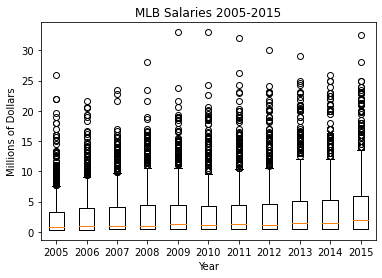

In [24]:
ten_year_salary_plot_data = [salaries_2005, salaries_2006, salaries_2007, salaries_2008, salaries_2009, salaries_2010, salaries_2011,
                            salaries_2012, salaries_2013, salaries_2014, salaries_2015]
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

fig1, ax1 = plt.subplots()
ax1.set_title("MLB Salaries 2005-2015")
ax1.set_xlabel("Year")
ax1.set_ylabel("Millions of Dollars")
ax1.boxplot(ten_year_salary_plot_data, labels = years)
plt.savefig("boxplot")
plt.show()


In [7]:
#Championship Series SECTION
playoffs_cs_df = playoffs_df.loc[playoffs_df['round'].isin(['NLCS','ALCS'])]
playoffs_cs_df.head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
222,2005,ALCS,CHA,AL,LAA,AL,4,1,0
225,2005,NLCS,HOU,NL,SLN,NL,4,2,0
229,2006,ALCS,DET,AL,OAK,AL,4,0,0
232,2006,NLCS,SLN,NL,NYN,NL,4,3,0
236,2007,ALCS,BOS,AL,CLE,AL,4,3,0


In [8]:
#amount of times teams made it conference championship series
winner=playoffs_cs_df['teamIDwinner'].value_counts()
print(winner)
loser=playoffs_cs_df['teamIDloser'].value_counts()
type(loser)
data= {"winner":winner,"loser":loser}
playoffs_record= pd.DataFrame(data)

playoffs1_record=playoffs_record.fillna(0)
playoffs1_record

SFN    3
SLN    3
BOS    2
TEX    2
DET    2
KCA    2
PHI    2
NYA    1
NYN    1
HOU    1
TBA    1
COL    1
CHA    1
Name: teamIDwinner, dtype: int64


,winner,loser
ARI,0.0,1.0
BAL,0.0,1.0
BOS,2.0,1.0
CHA,1.0,0.0
CHN,0.0,1.0
CLE,0.0,1.0
COL,1.0,0.0
DET,2.0,2.0
HOU,1.0,0.0
KCA,2.0,0.0


In [52]:
# Labels for the sections of our pie chart
labels = ["BOS","DET","KCA", "LAA", "TEX","NYA"]

# The values of each section of the pie chart
sizes = [3,4,3,2,2,3]

# The colors of each section of the pie chart
colors = ["blue", "orange", "lightcoral", "red","green","yellow"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1, 0, 0,0,0)

([<matplotlib.patches.Wedge at 0x19d84ac53d0>,
 [Text(-0.6807815892870961, -0.8640233953358761, 'BOS'),
  Text(0.7033474334731953, -0.9722666238366251, 'DET'),
  Text(1.033661865252268, 0.37622220604743994, 'KCA'),
  Text(0.32268862466708975, 1.0516045128804186, 'LAA'),
  Text(-0.4699916107906386, 0.9945390318064048, 'TEX'),
  Text(-1.0768925074511062, 0.2242822493994323, 'NYA')],
 [Text(-0.37133541233841605, -0.47128548836502326, '17.6%'),
  Text(0.41028600285936384, -0.5671555305713645, '23.5%'),
  Text(0.5638155628648733, 0.20521211238951267, '17.6%'),
  Text(0.17601197709113983, 0.5736024615711373, '11.8%'),
  Text(-0.2563590604312574, 0.5424758355307662, '11.8%'),
  Text(-0.5873959131551488, 0.12233577239969033, '17.6%')])

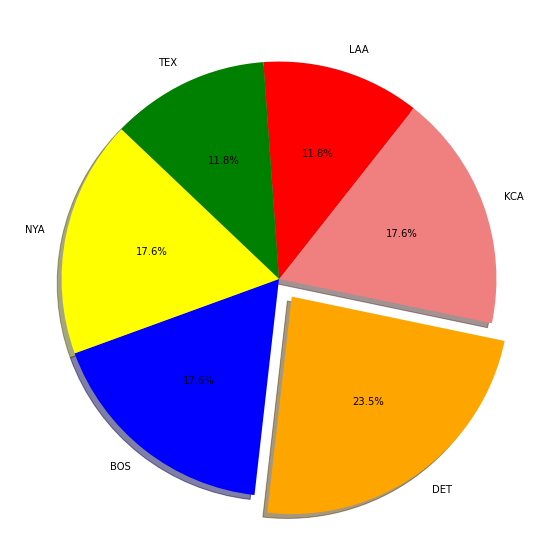

In [53]:
#ALCS appearences
plt.figure(figsize=(10, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

In [51]:
# Labels for the sections of our pie chart
labels = ["SLN","SFN","PHI", "NYN", "LAN","COL"]

# The values of each section of the pie chart
sizes = [6,3,3,2,3,1]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "blue","white","purple"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1,0, 0, 0,0,0)

([<matplotlib.patches.Wedge at 0x1e45f08fcf8>,
 [Text(-0.20837777631857382, -1.1817693101178954, 'SLN'),
  Text(1.0832885432166985, -0.19101291091296255, 'SFN'),
  Text(0.707066278611626, 0.8426489646645907, 'PHI'),
  Text(-0.19101313348403376, 1.0832885039714077, 'NYN'),
  Text(-0.9526280242657644, 0.5499998612577156, 'LAN'),
  Text(-1.08328849726493, -0.19101317151832783, 'COL')],
 [Text(-0.12155370285250139, -0.6893654309021057, '33.3%'),
  Text(0.590884659936381, -0.10418886049797955, '16.7%'),
  Text(0.38567251560634136, 0.4596267079988676, '16.7%'),
  Text(-0.10418898190038203, 0.5908846385298587, '11.1%'),
  Text(-0.5196152859631442, 0.29999992432239025, '16.7%'),
  Text(-0.5908846348717799, -0.10418900264636062, '5.6%')])

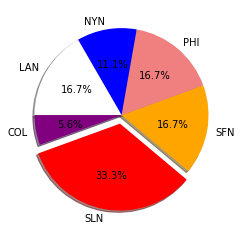

In [33]:
#NLCS appearences
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

In [27]:
#formula for payroll broken up by year
#salaries_df = salaries_df.groupby(['
#salaries_df.head()

In [54]:
#team payroll per yr 
# tmsalaries_df = salaries_df.groupby('teamID', as_index=False).sum()

# tmsalaries_df.head(22)